## Chirp.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.

Demonstration:
1. SplinesDynamicModel
2. NestedSampler


In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

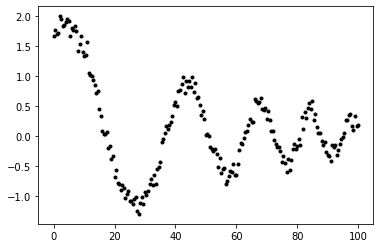

In [2]:
t = numpy.linspace( 0, 100, 201, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( 201 ) * 0.1
plt.plot( t, y, 'k.' )
plt.show()

In [3]:
knots =[0, 30, 60, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

# Tools.printclass( mdl )


Fit all parameters of
  DynModBasicSplines of order 3 with 4 knots.
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine  BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0  -2.48e+07 8118383.6  -1.66e+07     13  [   -5.274   -0.483   -0.828    6.896 ...    0.011]


     100  -5.83e+04    482.2  -5.78e+04      9  [   -7.305   -9.290   -3.575    2.120 ...    0.197]


     200  -6.36e+03     35.6  -6.32e+03     14  [   -2.787    7.834    3.122   -2.600 ...    0.515]


     300  -2.62e+03     12.5  -2.61e+03      9  [    7.064   -0.560    9.998   -2.643 ...    0.750]


     400  -1.79e+03     16.5  -1.78e+03     14  [    1.144    0.553    6.844   -8.334 ...    0.432]


     500  -1.37e+03      9.8  -1.36e+03     12  [    3.142   -4.924    9.321   -2.681 ...    0.714]


     600  -1.11e+03     11.1  -1.09e+03     13  [   -4.508    8.944   -4.977    0.274 ...    0.651]


     700      -880.     11.8      -868.     12  [    1.445    1.102   -4.833    4.689 ...    0.899]


     800      -745.     12.4      -731.     13  [    1.773   -6.710   -0.536   -1.157 ...    0.994]


     900      -651.     12.1      -639.     13  [    2.392   -3.672    7.682   -5.066 ...    0.881]


    1000      -573.     14.5      -559.     13  [   -2.511    9.083    2.237   -1.194 ...    0.833]


    1100      -511.     14.6      -495.     12  [    7.725   -6.748    5.423   -2.251 ...    0.826]


    1200      -462.     15.4      -445.     12  [    4.458    5.535    2.304   -1.430 ...    0.978]


    1300      -426.     15.4      -410.     14  [    3.277   -6.707    8.353   -5.161 ...    0.986]


    1400      -393.     16.7      -375.     12  [    3.973   -2.727   -1.782    1.808 ...    0.598]


    1500      -360.     17.5      -342.     10  [    4.003    4.018   -3.379    0.542 ...    0.948]


    1600      -336.     18.4      -316.     14  [    3.131    1.982    0.846   -3.354 ...    0.468]


    1700      -313.     19.7      -293.     15  [   -0.016    2.302    2.680   -7.967 ...    0.848]


    1800      -291.     20.0      -271.     14  [    1.054    6.116   -4.613    1.447 ...    0.863]


    1900      -273.     21.1      -251.     14  [   -2.285    3.805   -0.306    1.892 ...    0.766]


    2000      -258.     21.6      -236.     14  [    1.951    1.147    2.304   -2.957 ...    0.863]


    2100      -242.     22.8      -219.     13  [   -0.090    1.912    1.227   -1.631 ...    0.796]


    2200      -229.     23.6      -204.     10  [    1.555    2.260   -4.714    2.340 ...    0.605]


    2300      -215.     25.0      -189.     14  [    3.444    0.668    2.247   -3.831 ...    0.561]


    2400      -201.     26.1      -174.     13  [    3.773    0.162   -4.152    3.053 ...    0.560]


    2500      -188.     26.7      -161.     12  [    1.774    1.997   -4.642    3.153 ...    0.305]


    2600      -173.     27.4      -144.     13  [    0.892    3.273   -0.457   -0.292 ...    0.639]


    2700      -159.     29.1      -129.     12  [    1.163    2.605   -2.100   -0.877 ...    0.451]


    2800      -145.     29.7      -114.     12  [    0.990    4.074   -5.868    3.005 ...    0.192]


    2900      -132.     30.7      -99.7     15  [    1.244    2.290   -3.766    1.637 ...    0.538]


    3000      -120.     31.2      -88.1     12  [    1.881    3.342   -5.214    3.509 ...    0.455]


    3100      -111.     32.0      -78.0     12  [    1.524    3.109   -6.159    3.452 ...    0.246]


    3200      -101.     33.2      -66.8     12  [    2.023    3.027   -5.792    3.365 ...    0.320]


    3300      -91.1     34.8      -55.1     11  [    1.843    3.898   -4.008    1.494 ...    0.281]


    3400      -80.3     35.4      -43.9     13  [    1.342    2.913   -3.246    1.433 ...    0.223]


    3500      -69.0     36.4      -31.8     15  [    1.993    2.769   -3.141    0.019 ...    0.284]


    3600      -60.3     37.4      -22.0     13  [    1.719    3.468   -4.457    1.720 ...    0.222]


    3700      -51.1     38.2      -11.9     14  [    1.857    3.192   -4.162    0.605 ...    0.241]


    3800      -40.0     39.4      0.459     12  [    1.725    3.123   -3.429    2.016 ...    0.256]


    3900      -30.3     39.9       10.4     14  [    1.831    3.521   -4.231    2.189 ...    0.227]


    4000      -24.2     40.9       17.8     13  [    1.380    3.452   -3.538    1.413 ...    0.169]


    4100      -16.2     41.9       26.9     13  [    1.842    2.974   -4.015    1.425 ...    0.132]


    4200      -7.70     42.9       36.1     14  [    1.952    2.930   -3.168    1.468 ...    0.195]


    4300      -1.58     43.7       43.1     13  [    1.523    3.678   -3.247    0.509 ...    0.199]


    4400       4.80     44.8       50.8     15  [    1.711    2.871   -3.343    1.463 ...    0.196]


    4500       11.8     45.8       58.9     13  [    1.620    3.159   -3.334    1.033 ...    0.179]


    4600       18.5     46.8       66.3     13  [    1.770    2.941   -3.779    1.042 ...    0.164]


    4700       24.3     47.6       72.8     13  [    1.592    3.204   -3.733    2.111 ...    0.172]


    4800       30.3     48.7       80.0     13  [    1.774    3.003   -3.400    1.079 ...    0.200]


    4900       35.3     49.4       85.7     13  [    1.829    2.957   -3.190   -0.076 ...    0.161]


    5000       40.0     50.5       91.6     14  [    1.754    3.050   -2.977    0.227 ...    0.166]


    5100       46.0     51.7       98.6     13  [    1.531    3.154   -2.825    0.244 ...    0.159]


    5200       49.9     52.1       103.     13  [    1.708    2.814   -3.220    0.752 ...    0.155]


    5300       53.4     53.0       108.     13  [    1.780    2.862   -3.688    0.989 ...    0.143]


    5400       57.3     54.2       113.     13  [    1.764    2.850   -3.709    1.176 ...    0.158]


    5500       61.3     55.1       118.     13  [    1.626    3.383   -3.108    0.566 ...    0.162]


    5600       64.3     55.9       122.     13  [    1.493    2.958   -3.321    0.881 ...    0.138]


    5700       67.0     56.7       125.     13  [    1.685    2.927   -3.148    0.644 ...    0.155]


    5800       69.2     57.4       128.     13  [    1.784    2.850   -3.966    0.678 ...    0.126]


    5900       71.6     58.5       132.     13  [    1.806    2.961   -2.698    0.051 ...    0.137]


    6000       74.6     59.7       136.     13  [    1.678    2.853   -3.826    0.749 ...    0.123]


    6100       77.0     60.5       139.     13  [    1.676    2.886   -1.714   -0.872 ...    0.116]


    6200       79.2     61.3       142.     15  [    1.730    3.028   -3.070    0.703 ...    0.131]


    6300       81.3     62.3       145.     13  [    1.696    3.002   -4.078    0.813 ...    0.122]


    6400       83.5     63.3       148.     14  [    1.597    2.915   -2.245   -0.277 ...    0.123]


    6500       85.4     64.1       151.     13  [    1.738    3.002   -1.822   -0.740 ...    0.134]


    6600       86.9     64.9       153.     13  [    1.627    2.903   -1.994   -0.639 ...    0.117]


    6700       88.3     65.7       156.     14  [    1.639    3.089   -2.766    0.091 ...    0.113]


    6800       89.8     66.8       158.     13  [    1.653    2.984   -1.789   -0.749 ...    0.125]


    6900       91.1     67.6       160.     14  [    1.729    3.028   -2.789    0.040 ...    0.121]


    7000       92.1     68.3       162.     13  [    1.632    2.989   -2.113   -0.509 ...    0.115]


    7100       93.3     69.3       164.     13  [    1.681    3.093   -3.237    0.354 ...    0.111]


    7200       94.3     70.1       166.     13  [    1.583    3.141   -2.256   -0.479 ...    0.118]


    7300       95.3     71.1       168.     13  [    1.541    3.160   -2.464   -0.331 ...    0.104]


    7400       96.0     71.7       170.     14  [    1.627    3.020   -4.005    0.719 ...    0.109]


    7500       96.6     72.3       171.     14  [    1.679    3.004   -1.966   -0.699 ...    0.105]


    7600       97.2     73.1       173.     13  [    1.673    2.880   -1.657   -0.860 ...    0.116]


    7700       97.7     73.8       174.     13  [    1.680    2.954   -1.786   -0.798 ...    0.112]


    7800       98.2     74.4       175.     13  [    1.657    2.994   -2.013   -0.691 ...    0.105]


    7900       98.5     75.1       176.     13  [    1.641    3.080   -2.307   -0.362 ...    0.101]


    8000       98.9     75.8       178.     13  [    1.607    2.974   -1.898   -0.702 ...    0.101]


    8100       99.2     76.4       179.     13  [    1.628    2.941   -2.196   -0.519 ...    0.099]


    8200       99.4     77.0       180.     13  [    1.658    2.924   -1.999   -0.542 ...    0.099]


    8300       99.6     77.4       181.     13  [    1.729    2.998   -2.053   -0.586 ...    0.098]


    8400       99.7     77.7       181.     13  [    1.593    3.188   -2.347   -0.391 ...    0.096]


    8500       99.8     78.0       182.     13  [    1.635    3.046   -2.277   -0.399 ...    0.095]


    8600       99.8     78.1       182.     13  [    1.619    3.149   -1.951   -0.655 ...    0.101]


    8700       99.8     78.2       183.     13  [    1.636    3.001   -2.244   -0.409 ...    0.097]


    8800       99.9     78.3       183.     13  [    1.638    2.998   -2.234   -0.440 ...    0.098]


    8900       99.9     78.3       184.     13  [    1.673    3.038   -2.222   -0.442 ...    0.097]


    9000       99.9     78.3       184.     13  [    1.653    3.079   -2.291   -0.389 ...    0.093]


    9100       99.9     78.4       185.     13  [    1.692    3.018   -2.243   -0.448 ...    0.099]


    9200       99.9     78.4       185.     13  [    1.633    3.033   -2.233   -0.453 ...    0.095]


    9300       99.9     78.4       185.     13  [    1.643    3.072   -2.228   -0.422 ...    0.096]


    9400       99.9     78.4       185.     13  [    1.611    3.064   -2.279   -0.415 ...    0.096]


    9500       99.9     78.4       186.     13  [    1.657    3.035   -2.299   -0.389 ...    0.095]


    9600       99.9     78.4       186.     13  [    1.651    3.046   -2.208   -0.469 ...    0.098]


    9700       99.9     78.4       186.     13  [    1.631    3.110   -2.307   -0.406 ...    0.097]


    9800       99.9     78.4       186.     13  [    1.653    3.065   -2.142   -0.520 ...    0.096]


    9900       99.9     78.4       187.     13  [    1.616    3.032   -2.288   -0.406 ...    0.093]


   10000       99.9     78.4       187.     13  [    1.648    3.058   -2.168   -0.493 ...    0.098]


   10100       99.9     78.4       187.     13  [    1.642    3.021   -2.291   -0.413 ...    0.094]


   10200       99.9     78.4       187.     13  [    1.654    3.022   -2.247   -0.449 ...    0.095]


   10300       99.9     78.4       187.     13  [    1.635    3.045   -2.299   -0.401 ...    0.093]


   10400       99.9     78.4       187.     13  [    1.659    3.002   -2.245   -0.461 ...    0.096]


   10500       99.9     78.4       187.     13  [    1.637    3.051   -2.331   -0.379 ...    0.096]


   10600       99.9     78.4       188.     13  [    1.649    3.021   -2.266   -0.420 ...    0.095]


   10700       99.9     78.4       188.     13  [    1.669    2.985   -2.278   -0.406 ...    0.094]


   10800       99.9     78.4       188.     13  [    1.638    3.007   -2.233   -0.434 ...    0.094]


   10900       99.9     78.4       188.     13  [    1.648    3.001   -2.241   -0.467 ...    0.095]


   11000       99.9     78.4       188.     13  [    1.637    3.038   -2.317   -0.405 ...    0.097]


   11100       99.9     78.4       188.     13  [    1.641    3.057   -2.322   -0.391 ...    0.096]


   11200       99.9     78.4       188.     13  [    1.636    3.041   -2.258   -0.427 ...    0.094]


   11300       99.9     78.4       188.     13  [    1.637    3.048   -2.312   -0.400 ...    0.095]


   11400       99.9     78.4       188.     13  [    1.648    2.999   -2.234   -0.459 ...    0.095]


   11500       99.9     78.4       188.     13  [    1.652    2.998   -2.231   -0.468 ...    0.097]


   11600       99.9     78.4       188.     13  [    1.635    3.027   -2.258   -0.457 ...    0.095]


   11700       99.9     78.4       188.     13  [    1.634    3.028   -2.247   -0.465 ...    0.095]


   11800       99.9     78.4       188.     13  [    1.656    2.987   -2.227   -0.475 ...    0.095]


   11900       99.9     78.4       188.     13  [    1.655    3.000   -2.263   -0.438 ...    0.094]


   12000       99.9     78.4       188.     13  [    1.651    3.010   -2.265   -0.437 ...    0.094]


   12100       99.9     78.4       188.     13  [    1.636    3.031   -2.250   -0.454 ...    0.094]


   12200       99.9     78.4       188.     13  [    1.656    2.989   -2.234   -0.473 ...    0.095]


   12300       99.9     78.4       189.     13  [    1.643    3.020   -2.254   -0.459 ...    0.095]


   12400       99.9     78.4       189.     13  [    1.638    3.025   -2.255   -0.464 ...    0.096]


   12500       99.9     78.4       189.     13  [    1.654    3.000   -2.234   -0.476 ...    0.095]


   12600       99.9     78.4       189.     13  [    1.641    3.018   -2.261   -0.449 ...    0.095]


   12700       99.9     78.4       189.     13  [    1.646    3.018   -2.247   -0.467 ...    0.095]


   12800       99.9     78.4       189.     13  [    1.652    3.011   -2.222   -0.492 ...    0.095]


   12900       99.9     78.4       189.     13  [    1.643    2.991   -2.199   -0.495 ...    0.094]


   13000       99.9     78.4       189.     13  [    1.649    2.998   -2.203   -0.492 ...    0.094]


   13100       99.9     78.4       189.     13  [    1.650    3.010   -2.242   -0.467 ...    0.095]


   13200       99.9     78.4       189.     13  [    1.646    3.008   -2.198   -0.495 ...    0.094]


   13300       99.9     78.4       189.     13  [    1.643    3.007   -2.209   -0.484 ...    0.094]


   13400       99.9     78.4       189.     13  [    1.647    3.014   -2.221   -0.485 ...    0.094]


   13500       99.9     78.4       189.     13  [    1.640    3.021   -2.215   -0.485 ...    0.095]


   13600       99.9     78.4       189.     13  [    1.645    3.007   -2.211   -0.484 ...    0.095]


   13700       99.9     78.4       189.     13  [    1.647    3.005   -2.205   -0.496 ...    0.094]


   13800       99.9     78.4       189.     13  [    1.655    3.007   -2.200   -0.497 ...    0.095]


   13900       99.9     78.4       189.     13  [    1.645    3.004   -2.211   -0.490 ...    0.094]


   14000       99.9     78.4       189.     13  [    1.647    3.006   -2.215   -0.485 ...    0.095]


   14100       99.9     78.4       189.     13  [    1.645    3.000   -2.191   -0.503 ...    0.094]


   14200       99.9     78.4       189.     13  [    1.643    3.007   -2.204   -0.490 ...    0.095]


   14300       99.9     78.4       189.     13  [    1.648    3.012   -2.207   -0.498 ...    0.095]


   14400       99.9     78.4       189.     13  [    1.643    3.007   -2.210   -0.485 ...    0.095]


   14500       99.9     78.4       189.     13  [    1.644    3.001   -2.202   -0.498 ...    0.095]


   14600       99.9     78.4       189.     13  [    1.643    3.013   -2.208   -0.496 ...    0.094]


   14700       99.9     78.4       189.     13  [    1.644    3.010   -2.203   -0.501 ...    0.095]


   14800       99.9     78.4       189.     13  [    1.635    3.024   -2.214   -0.487 ...    0.095]


   14900       99.9     78.4       189.     13  [    1.644    3.002   -2.194   -0.500 ...    0.095]


   15000       99.9     78.4       189.     13  [    1.636    3.014   -2.200   -0.506 ...    0.094]


   15100       99.9     78.4       189.     13  [    1.647    2.997   -2.199   -0.496 ...    0.094]


   15200       99.9     78.4       189.     13  [    1.643    3.009   -2.202   -0.495 ...    0.094]


   15300       99.9     78.4       189.     13  [    1.644    3.003   -2.188   -0.508 ...    0.094]


   15400       99.9     78.4       189.     13  [    1.642    3.013   -2.206   -0.498 ...    0.094]


   15500       99.9     78.4       189.     13  [    1.651    3.006   -2.191   -0.502 ...    0.094]


   15600       99.9     78.4       189.     13  [    1.645    3.006   -2.185   -0.508 ...    0.095]


   15675       99.9     78.4       189.     13 
[    1.643    3.007   -2.181   -0.507    2.120   -2.056    1.668   -1.503    1.087   -1.147    0.654    0.164    0.095]
Engines              success     reject     failed       best      calls
GalileanEngine        105198      52509      59367          0      17033
ChordEngine           119422     262083          0          0      17033
BirthEngine             1269      45218       7275          0      17033
DeathEngine              837       7696       8500          0      17033
StructureEngine        39726          0      96155          0      17033
Calls to LogL         780991   to dLogL      52509
Samples       15775
Evidence        43.376 +-      0.384


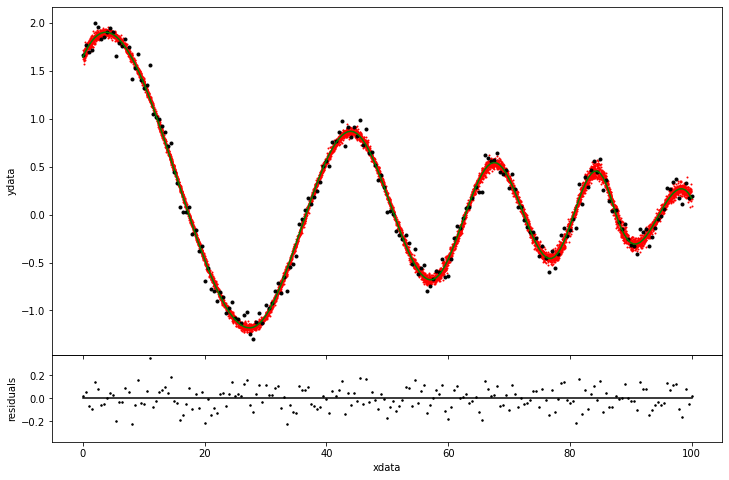

In [4]:
#eng = ["galilean", "birth", "death", "struct"]
ns = NestedSampler( t, mdl, y, seed=1235 )
ns.distribution.setLimits( [0.01,1] )
ns.minimumIterations = 1000
ns.verbose=2
#ns.engines[1].slow = 100

evid = ns.sample( plot=True )



In [5]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000   28.233   33.293   44.789   57.712   67.186   77.524   85.777   87.462  100.000]
[    1.514    3.678   -3.833    1.141    0.543   -1.899    1.423   -1.097    0.328   -0.652    0.499    0.483]
[    0.000   27.599   33.267   44.346   57.820   67.844   77.394   85.116   88.804  100.000]
[    1.514    3.678   -3.833    1.141    0.543   -1.899    1.423   -1.097    0.328   -0.652    0.499    0.483]


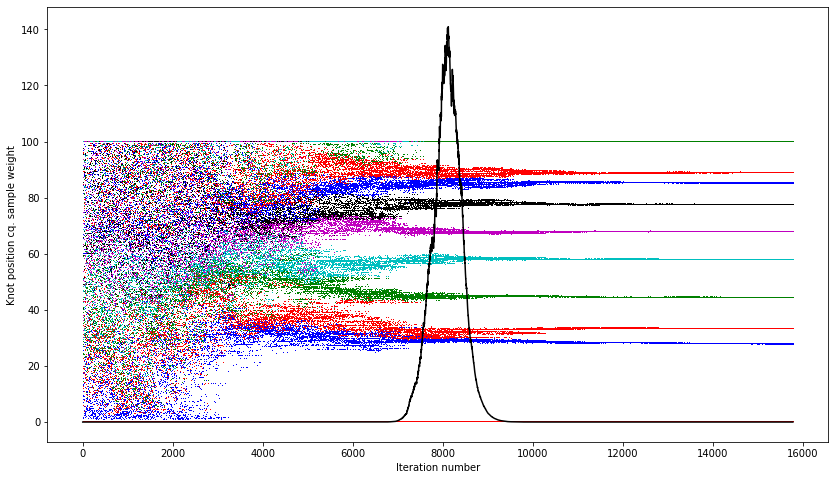

In [6]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
plt.figure( 1, figsize=[14,8] )    
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
plt.plot( 100000 * wgts, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

